# Домашняя работа №2

In [1]:
import sys
sys.path.append(r'c:\users\igor.i.plotnikov\pycharmprojects\py38\lib\site-packages')
sys.path

import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime, minimize
from sympy import sin, cos, symbols, diff
from scipy.misc import derivative

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

### a) бесконечное количество локальных экстремумов

In [2]:
x = np.linspace(0,40,100)
y = np.sin(x)

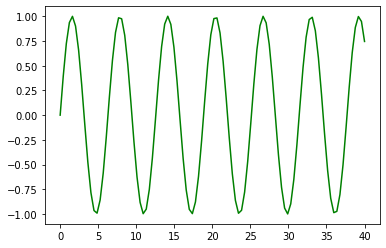

In [3]:
plt.plot(x, y, 'g')

### б) 2 локальных экстремума

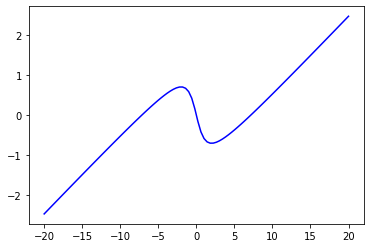

In [4]:
x1 = np.linspace(-20,20,100)
y1 = x1/5 - np.arctan(x1)
plt.plot(x1, y1, 'b')

### с) 3 локальных экстремума

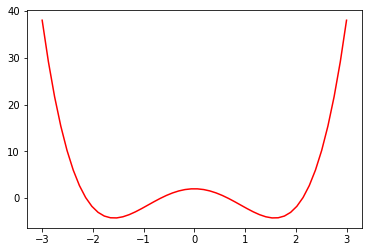

In [5]:
x2 = np.linspace(-3,3)
y2 = (x2 ** 4) - (5 * x2 ** 2) + 2
plt.plot(x2, y2, 'r')

### *4) область определения функции - 1 точка

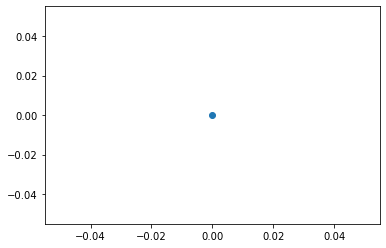

In [6]:
x3 = 0
y3 = sqrt(-(x3 ** 2))
plt.scatter(x3, y3)

### Задание 2

In [10]:
from sympy.abc import x, y

Посчитайте 1-ую и 2-ую производные функции:

$f(x) = sin^2(2x+1)$


In [12]:
f = (sin(2 * x + 1)) ** 2
diff(f, x)

4*sin(2*x + 1)*cos(2*x + 1)

In [13]:
diff(f, x, 2)

8*(-sin(2*x + 1)**2 + cos(2*x + 1)**2)

### Задание 3: 
Посчитайте частные производные функции 
$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

In [14]:
f = 2 * (x**2) * y**3 + 1/x + (y**2) * x + 7
diff(f, x)

4*x*y**3 + y**2 - 1/x**2

In [15]:
diff(f, y)

6*x**2*y**2 + 2*x*y

In [16]:
diff(f, x).evalf(subs={x: 1, y: 1})

4.00000000000000

In [17]:
diff(f, y).evalf(subs={x: 1, y: 1})

8.00000000000000

### Задание 4:

Градиентный спуск своими руками

в ноутбуке к дз говорится, что функция для вычисления градиента есть в лекционном ноутбуке. Использовать нужно функцию approx_fprime

In [21]:
def f(x):
    return (x[0]**2) + (x[1]**2)
x = np.array([100, 200])
lr = 0.1
for i in range(10000):
    x = x - lr * approx_fprime(x, f, 1e-6)
x

array([-5.55555556e-08,  5.55555556e-08])

In [19]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [-5.55555556e-08  5.55555556e-08]
Значение функции в минимуме:  6.17283950617284e-15


Проверка с помощью встроенной функции scipy: 

In [20]:
x = np.array([100, 200])
res = minimize(f, x, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 164
[ 3.31391559e-09 -1.82888492e-09]
